In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

#### Load data

In [2]:
dta_test = pd.read_csv("test.csv")
dta_train = pd.read_csv("train.csv")

In [3]:
dta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
dta_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Check if there are missing values

In [5]:
dta_train.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
dta_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Explore each feature

In [7]:
dta_train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [8]:
dta_train.groupby('Pclass').agg({'Survived':'mean','PassengerId':'count'})

,Survived,PassengerId
Pclass,,
1,0.629630,216
2,0.472826,184
3,0.242363,491


In [9]:
def get_class(a):
    if a == 1:
        return 0
    elif a == 2:
        return 1
    elif a == 3:
        return 2
    else:
        return 3

dta_train['class'] = dta_train['Pclass'].apply(get_class)

In [10]:
dta_train.groupby("Sex").agg({'Survived':'mean','PassengerId':'count'})

,Survived,PassengerId
Sex,,
female,0.742038,314
male,0.188908,577


In [11]:
def get_sex(a):
    if a == "female":
        return 0
    else:
        return 1
    
dta_train['sex'] = dta_train['Sex'].apply(get_sex)

C:\Users\Qiuyan\Miniconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Qiuyan\Miniconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <a list of 50 Patch objects>)

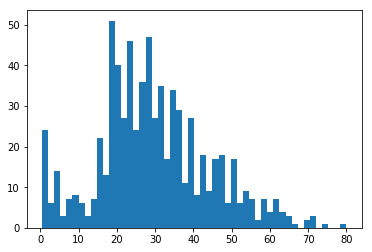

In [12]:
plt.hist(dta_train.Age,50)

In [13]:
def group_age(a):
    if ~math.isnan(a):
        if a>=0 and a < 10:
            return 0
        elif a >= 10 and a < 20:
            return 1
        elif a>= 20 and a < 30:
            return 2
        elif a >= 30 and a < 40:
            return 3
        elif a >= 40 and a < 50:
            return 4
        elif a >= 50 and a < 60:
            return 5
        elif a >= 60 and a < 70:
            return 6
        elif a >= 70:
            return 7
        else:
            return 8

        
dta_train['age_group'] = dta_train['Age'].apply(group_age)
dta_train.groupby('age_group').agg({'Survived':'mean'})

,Survived
age_group,
0,0.612903
1,0.401961
2,0.350000
3,0.437126
4,0.382022
5,0.416667
6,0.315789
7,0.142857
8,0.293785


In [14]:
dta_train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [15]:
dta_train.groupby('SibSp').agg({'Survived':'mean', 'PassengerId':'count'})

,Survived,PassengerId
SibSp,,
0,0.345395,608
1,0.535885,209
2,0.464286,28
3,0.250000,16
4,0.166667,18
5,0.000000,5
8,0.000000,7


In [16]:
dta_train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [17]:
dta_train.groupby('Parch').agg({'Survived':'mean', 'PassengerId':'count'})

,Survived,PassengerId
Parch,,
0,0.343658,678
1,0.550847,118
2,0.500000,80
3,0.600000,5
4,0.000000,4
5,0.200000,5
6,0.000000,1


In [18]:
def get_embarked(a):
    if a == 'C':
        return 0
    elif a =='Q':
        return 1
    else:
        return 2
    
dta_train['embarked'] = dta_train['Embarked'].apply(get_embarked)    
dta_train.groupby('Embarked').agg({'Survived':'mean', 'PassengerId':'count'})

,Survived,PassengerId
Embarked,,
C,0.553571,168
Q,0.389610,77
S,0.336957,644


In [19]:
dta_train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [20]:
def get_cabin(a):
    if type(a)==str:
        return a[0]
    else:
        return 'unknown'
dta_train['which_cabin'] = dta_train['Cabin'].apply(get_cabin)
dta_train.groupby('which_cabin').agg({'Survived':'mean', 'PassengerId':'count'})

,Survived,PassengerId
which_cabin,,
A,0.466667,15
B,0.744681,47
C,0.593220,59
D,0.757576,33
E,0.750000,32
F,0.615385,13
G,0.500000,4
T,0.000000,1
unknown,0.299854,687


In [21]:
def cabin_num(a):
    if a == 'A':
        return 0
    elif a == 'B':
        return 1
    elif a == 'C':
        return 2
    elif a == 'D':
        return 3
    elif a == 'E':
        return 4
    elif a == 'F':
        return 5
    elif a == 'G':
        return 6
    elif a == 'T':
        return 7
    else:
        return 8
    
dta_train['cabin_num'] = dta_train['which_cabin'].apply(cabin_num)

In [22]:
min_fare = dta_train.Fare.min()
max_fare = dta_train.Fare.max()
fare1 = np.quantile(dta_train.Fare,0.2)
fare2 = np.quantile(dta_train.Fare,0.4)
fare3 = np.quantile(dta_train.Fare,0.6)
fare4 = np.quantile(dta_train.Fare,0.8)
def fare_class(a):
    if a < fare1:
        return 0
    elif a >= fare1 and a < fare2:
        return 1
    elif a >= fare2 and a < fare3:
        return 2
    elif a >= fare3 and a < fare4:
        return 3
    elif a >= fare4:
        return 4
    else:
        return 5

dta_train['fare_class'] = dta_train['Fare'].apply(fare_class)
dta_train.groupby('fare_class').agg({'Survived':'mean', 'PassengerId':'count'})

,Survived,PassengerId
fare_class,,
0,0.216867,166
1,0.179191,173
2,0.420513,195
3,0.457143,175
4,0.620879,182


In [23]:
import re
def get_title(a):
    b = re.split(',',a)
    c = re.split(' ',b[1])
    return c[1]

dta_train['title'] = dta_train['Name'].apply(get_title)
dta_train.title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [24]:
dta_train[dta_train['title']=='the']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class,sex,age_group,embarked,which_cabin,cabin_num,fare_class,title
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,0,0,3,2,B,1,4,the


In [25]:
dta_train.groupby('title').agg({'PassengerId':'count','Survived':'mean'})

,PassengerId,Survived
title,,
Capt.,1,0.000000
Col.,2,0.500000
Don.,1,0.000000
Dr.,7,0.428571
Jonkheer.,1,0.000000
Lady.,1,1.000000
Major.,2,0.500000
Master.,40,0.575000
Miss.,182,0.697802


In [26]:
def set_title(a):
    if a == 'Mrs.':
        return 0
    elif a == 'Miss.':
        return 1
    elif a == 'Master.':
        return 2
    elif a == ' Mr.':
        return 3
    else:
        return 4

dta_train['title_class'] = dta_train['title'].apply(set_title)

#### Training: Random Forest

In [27]:
dta_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,class,sex,age_group,embarked,which_cabin,cabin_num,fare_class,title,title_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,2,1,2,2,unknown,8,0,Mr.,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,0,3,0,C,2,4,Mrs.,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,2,0,2,2,unknown,8,1,Miss.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,3,2,C,2,4,Mrs.,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,2,1,3,2,unknown,8,1,Mr.,4


In [61]:
x = dta_train[['class','sex','age_group','SibSp','Parch','fare_class','embarked','title_class']]

In [62]:
y = dta_train['Survived']

In [63]:
#x = pd.get_dummies(x)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.80)

In [65]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [66]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)
metrics.accuracy_score(y_train,y_pred_train)

0.9550561797752809

In [67]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(clf,x,y,cv=5,scoring='f1_macro')

In [68]:
scores

array([0.78656598, 0.75237154, 0.82698173, 0.77372881, 0.84852634])

In [69]:
clf.fit(x,y)
y_pred = clf.predict(x)
metrics.accuracy_score(y,y_pred)

0.9090909090909091

#### prepare test data and predict

In [39]:
dta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [38]:
dta_test['class'] = dta_test['Pclass'].apply(get_class)

In [40]:
dta_test['sex'] = dta_test['Sex'].apply(get_sex)

In [42]:
dta_test['age_group']=dta_test['Age'].apply(group_age)

In [43]:
dta_test['fare_class']=dta_test['Fare'].apply(fare_class)

In [44]:
dta_test['which_cabin']=dta_test['Cabin'].apply(get_cabin)
dta_test['cabin_num'] =  dta_test['which_cabin'].apply(cabin_num)

In [45]:
dta_test['embarked'] = dta_test['Embarked'].apply(get_embarked) 

In [46]:
dta_test['title'] = dta_test['Name'].apply(get_title)
dta_test['title_class'] = dta_test['title'].apply(set_title)

In [70]:
x_totest = dta_test[['class','sex','age_group','SibSp','Parch','fare_class','embarked','title_class']]

In [71]:
y_topred = clf.predict(x_totest)

In [72]:
d = {'PassengerId': dta_test['PassengerId'].tolist(),'Survived':y_topred}
predictions = pd.DataFrame(data=d)

In [73]:
predictions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [74]:
predictions.to_csv("gender_submission_QS.csv",index=False)